source : https://ins.uni-bonn.de/media/public/courses/WS1819/practical-lab-numerical-simulation/riverlevels.pandas.pickle?pk=212

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### The dataset

In [3]:
df = pd.read_pickle("riverlevels.pandas.pickle")

df.shape

(1192128, 15)

The task :

We build a prediction model based on the (small due to memory limitations) sub-dataset from 1/12/2013 - 31/12/2013 .

We predict with the model the next value in the dataset and then compare it with the real values.

In [4]:
df1 = df[1119100:1122048]
df1.head()

,Andernach,Bingen,Bonn,Frankfurt Osthafen,Kalkofen Neu,Kaub,Koblenz,Koblenz Up,Mainz,Oberwinter,Oestrich,Raunheim,Rockenau Ska,Speyer,Worms
2012-12-01 06:15:00+00:00,352.0,286.0,352.0,176.0,190.0,334.0,298.0,257.0,390.0,296.0,272.0,152.0,308.0,477.0,338.0
2012-12-01 06:30:00+00:00,353.0,285.0,353.0,176.0,189.0,335.0,297.0,255.0,391.0,298.0,272.0,153.0,304.0,477.0,338.0
2012-12-01 06:45:00+00:00,353.0,286.0,354.0,176.0,189.0,334.0,297.0,257.0,390.0,298.0,272.0,155.0,297.0,477.0,338.0
2012-12-01 07:00:00+00:00,352.0,287.0,355.0,175.0,189.0,334.0,298.0,257.0,390.0,299.0,271.0,156.0,296.0,477.0,337.0
2012-12-01 07:15:00+00:00,353.0,285.0,355.0,173.0,189.0,335.0,298.0,257.0,390.0,299.0,271.0,157.0,293.0,476.0,337.0


In [5]:
df1.tail()

,Andernach,Bingen,Bonn,Frankfurt Osthafen,Kalkofen Neu,Kaub,Koblenz,Koblenz Up,Mainz,Oberwinter,Oestrich,Raunheim,Rockenau Ska,Speyer,Worms
2012-12-31 22:00:00+00:00,642.0,430.0,671.0,269.0,338.0,539.0,551.0,518.0,536.0,574.0,407.0,260.0,303.0,610.0,473.0
2012-12-31 22:15:00+00:00,641.0,430.0,671.0,267.0,338.0,538.0,550.0,517.0,536.0,574.0,406.0,259.0,303.0,610.0,473.0
2012-12-31 22:30:00+00:00,641.0,430.0,671.0,266.0,338.0,538.0,550.0,517.0,535.0,574.0,406.0,259.0,303.0,609.0,472.0
2012-12-31 22:45:00+00:00,640.0,430.0,670.0,266.0,338.0,538.0,549.0,516.0,535.0,573.0,406.0,258.0,303.0,608.0,472.0
2012-12-31 23:00:00+00:00,640.0,430.0,670.0,266.0,338.0,537.0,549.0,516.0,535.0,573.0,405.0,258.0,303.0,608.0,471.0


In [6]:
# are there any missing values in the dataset ?
df1.isnull().values.any()

False

If there were missing values one way would be to replace them by the most recent value using the following code.

#### The "time-delayed" Hankel matrix

In [7]:
val = df1.values

In [8]:
h = 2    # time steps
n = 974
l = 1000   # length of observations (rows) taken into account for each feature (column)
H = np.zeros((val.shape[1]*n,l))
for i in range(n):
    for j in range(val.shape[1]):
        H[i*val.shape[1]+j,:] = val[i*h:i*h+l,j]

In [9]:
H.shape

(14610, 1000)

In [10]:
u,s,v = np.linalg.svd(H)

<IPython.core.display.Javascript object>


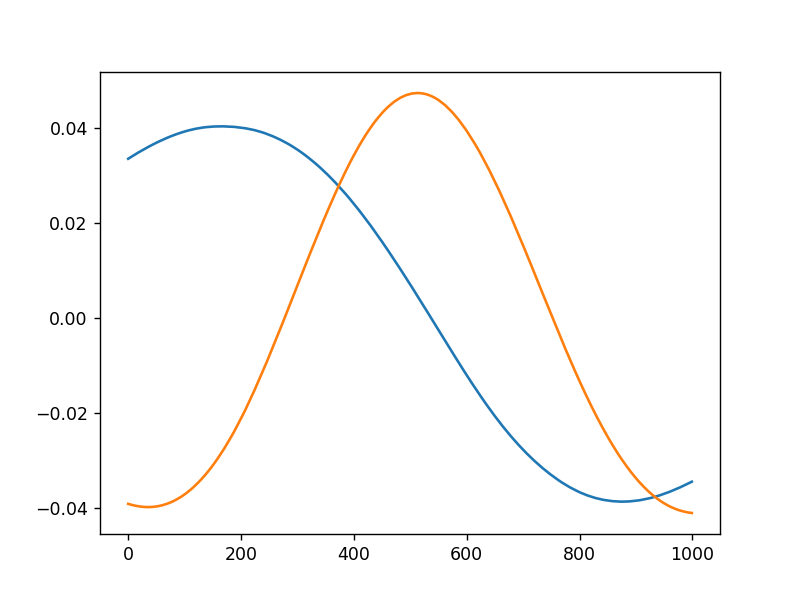

In [11]:
%matplotlib notebook
plt.plot(np.arange(v.shape[0]),v[1,:])
plt.plot(np.arange(v.shape[0]),v[2,:])

Remark :

We observe that the graph of the principal components resembles a sinusoidal graph. This is an indication that the underlying dynamical system is "close" to become a linear dynamical system.

Consequently, we can now use the DMD algorithm to determine the dmd modes of the system. Then we use them to make predictions for the future behaviour of the model.

#### The "dmd" and the "time evolution" functions

In [12]:
def dmd (A,r):
    """
    A : data-matrix, snapshots of a "linear" dynamical system
    Phi : the dmd modes
    """
    
    X = A[:,:-1]
    Y = A[:,1:]
    
    u,s,v = np.linalg.svd(X)
    U = u[:,:r]
    S = np.diag(s)[:r,:r]
    V = np.conjugate(v).T[:,:r]
    
    Atil = (((np.conjugate(U).T@Y)@V)@np.linalg.inv(S))
    mu,W = np.linalg.eig(Atil)

    Phi = (((Y@V)@np.linalg.inv(S))@ W) 
    
    b = ((np.linalg.pinv(Phi))@X[:,0])
    
    return mu, Phi, b

In [13]:
def time_evolution (A,r,f):
    """
    f : future time steps 
    """
    t = np.arange(A.shape[1]+f)
    
    Psi = np.zeros((r, t.size), dtype='complex')
    j = dmd(A,r)
    for i,_t in enumerate(t):
        Psi[:,i] = (j[0]**_t)*j[2]
    E = j[1]@Psi
    
    return E

#### The prediction

In [14]:
np.sum(s[:80])/np.sum(s)

0.9497714849318643

In [15]:
D = time_evolution(H,80,1) # We predict one step ahead in the future (f = 1)

The prediction is :

In [16]:
for i,j in enumerate(df.columns):
    print('prediction for',j, 'is' ,D.real[i-15,:][-1])

prediction for Andernach is 640.8319528984689
prediction for Bingen is 429.3410956145569
prediction for Bonn is 670.6245442753735
prediction for Frankfurt Osthafen is 269.9670036865987
prediction for Kalkofen Neu is 337.18285557894865
prediction for Kaub is 537.4191457751219
prediction for Koblenz is 549.1036036337167
prediction for Koblenz Up is 515.3030752507968
prediction for Mainz is 535.5831709469009
prediction for Oberwinter is 573.4333267027963
prediction for Oestrich is 405.7166509183399
prediction for Raunheim is 261.24305172683154
prediction for Rockenau Ska is 299.78335883078023
prediction for Speyer is 609.6138347321217
prediction for Worms is 471.81948060241336


The real values : 

In [17]:
d = df[1122048:1122049]
d

,Andernach,Bingen,Bonn,Frankfurt Osthafen,Kalkofen Neu,Kaub,Koblenz,Koblenz Up,Mainz,Oberwinter,Oestrich,Raunheim,Rockenau Ska,Speyer,Worms
2012-12-31 23:15:00+00:00,639.0,428.0,669.0,265.0,337.0,537.0,548.0,515.0,534.0,572.0,405.0,258.0,303.0,608.0,471.0
